# Решающие деревья

![](https://drive.google.com/uc?id=13kmqLXa-3FBUJq0Q3XVOkz8TENpVTkqk)

*Source: https://www.upnxtblog.com/index.php/2017/12/06/17-machine-learning-algorithms-that-you-should-know/*

Сами по себе решающие деревья используются в машинном обучении относительно редко, однако очень распространены методы, основанные на их композиции - ансамблях (Random Forest, XGBoost, LightGBM).

## Линейные модели или решающие деревья?

- когда данные хорошо линейно разделимы, линейная модель лучше

- когда данные плохо линейно разделимы (много сложных нелинейных зависимостей в данных), модель, основанная на решающих деревьях, лучше

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (11, 6.5)

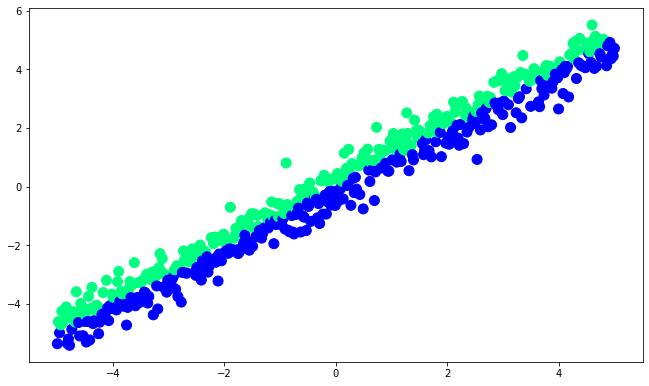

In [3]:
np.random.seed(13)
n = 500
X = np.zeros(shape=(n, 2))
X[:, 0] = np.linspace(-5, 5, 500)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=n)
y = (X[:, 1] > X[:, 0]).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='winter')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_lr, y_test)

0.992

In [7]:
!pip install mlxtend

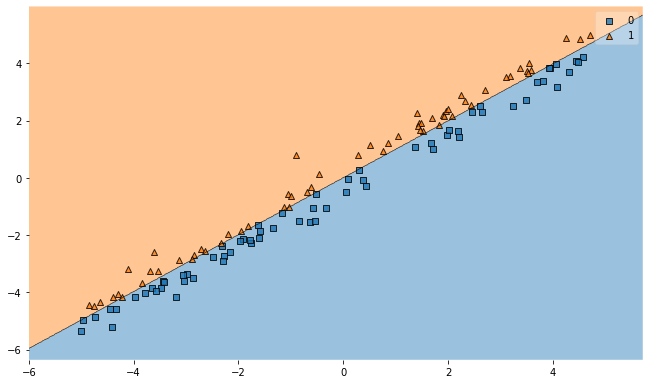

In [8]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, lr)

plt.show()

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [10]:
accuracy_score(y_pred_dt, y_test)

0.864

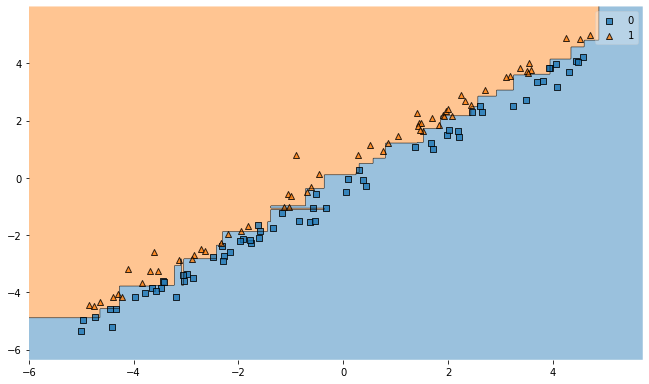

In [11]:
plot_decision_regions(X_test, y_test, dt)
plt.show()

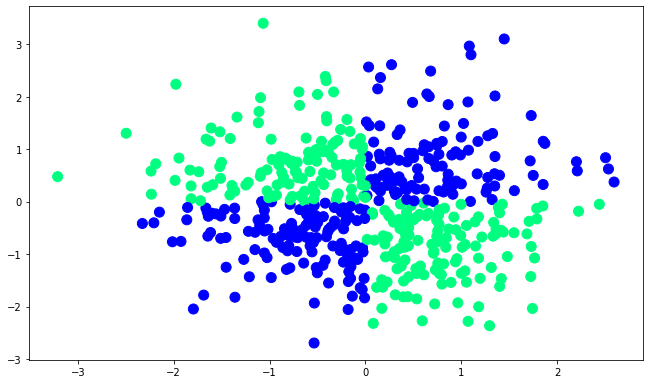

In [12]:
np.random.seed(13)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='winter')
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [14]:
lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_pred_lr, y_test)

0.392

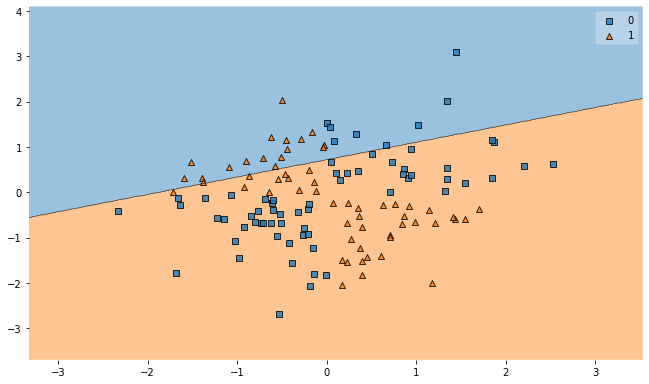

In [15]:
plot_decision_regions(X_test, y_test, lr)
plt.show()

In [16]:
dt = DecisionTreeClassifier(random_state=13)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_score(y_pred_dt, y_test)

0.968

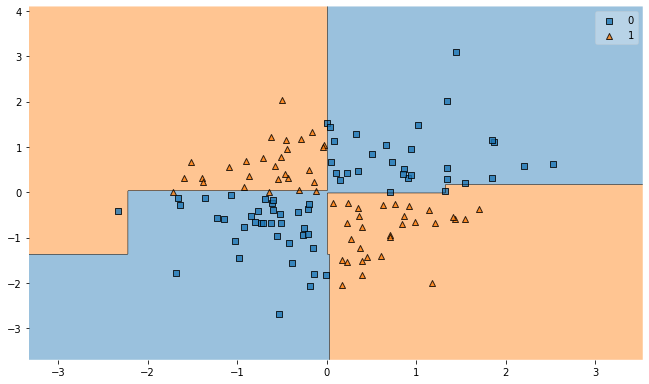

In [17]:
plot_decision_regions(X_test, y_test, dt)
plt.show()

## Переобучение

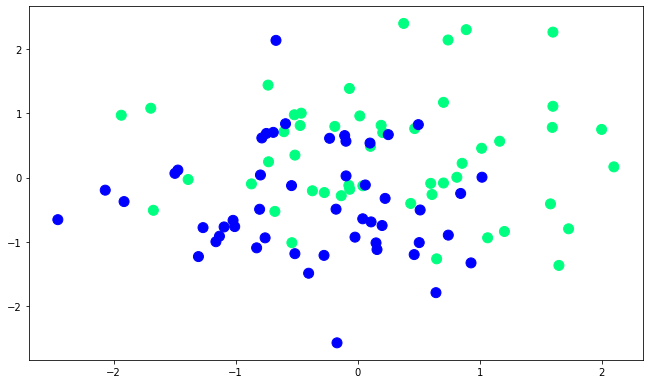

In [18]:
np.random.seed(13)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.25
X[50:, :] -= 0.25
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='winter')
plt.show()

Как влияют разные значения гиперпараметров решающего дерева на его структуру?

- `max_depth`: максимальная глубина дерева
- `min_samples_leaf`: минимальное число объектов в вершине дерева, необходимое для того, чтобы она стала листовой

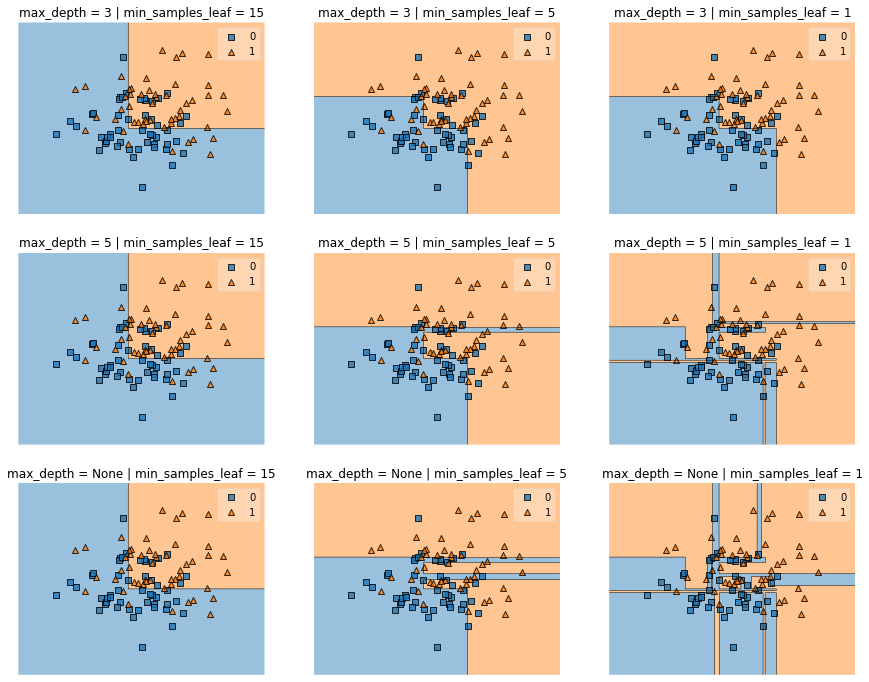

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
        dt.fit(X, y)
        ax[i][j].set_title('max_depth = {} | min_samples_leaf = {}'.format(max_depth, min_samples_leaf))
        ax[i][j].axis('off')
        plot_decision_regions(X, y, dt, ax=ax[i][j])
plt.show()

На любой выборке (исключая те, где есть объекты с одинаковыми значениями признаков, но разными ответами) можно получить нулевую ошибку - с помощью максимально переобученного дерева:

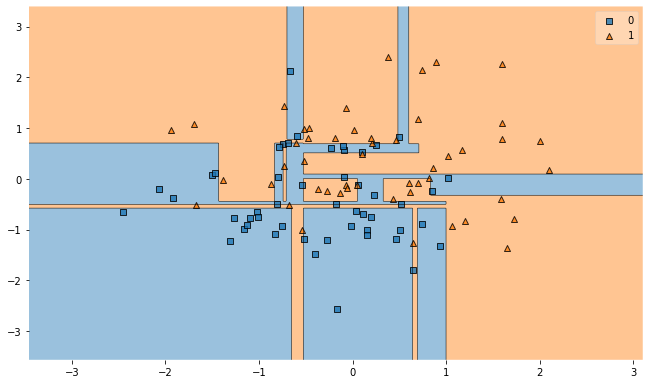

In [20]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=13)
dt.fit(X, y)
plot_decision_regions(X, y, dt)
plt.show()

In [21]:
accuracy_score(y, dt.predict(X))

1.0

## Неустойчивость

Посмотрим, как будет меняться структура дерева, если брать для обучения разные 90%-ые подвыборки исходной выборки.

In [0]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(random_state=13)
        idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
        X_part, y_part = X[idx_part, :], y[idx_part]
        dt.fit(X_part, y_part)
        ax[i][j].set_title('sample #{}'.format(seed_idx))
        ax[i][j].axis('off')
        plot_decision_regions(X_part, y_part, dt, ax=ax[i][j])
plt.show()

## Практика

In [0]:
import pandas as pd
from sklearn.datasets import load_boston

In [0]:
boston = load_boston()

In [0]:
print(boston['DESCR'])

In [0]:
boston.keys()

In [0]:
boston['feature_names']

In [0]:
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
X.head()

In [0]:
X.shape

In [0]:
y = boston['target']
y[:5]

In [0]:
y.shape

In [0]:
plt.title('House price distribution')
plt.xlabel('price')
plt.ylabel('# samples')
plt.hist(y, bins=20)
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

## Решающее дерево своими руками

$R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения.

Критерий ошибки:

$$
Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t}
$$

$R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

$H(R)$ - критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$.

_Реализуйте подсчет критерия ошибки. Для этого реализуйте функции для подсчета значения критерия информативности, а также для разбиения вершины._

In [0]:
def H(R):
    pass


def split_node(R_m, feature, t):
    pass


def q_error(R_m, feature, t):
    pass

_Переберите все возможные разбиения выборки по одному из признаков и постройте график критерия ошибки в зависимости от значения порога._

In [0]:
feature = '<choose feature>'
Q_array = []
feature_values = np.unique(X_train[feature])
for t in feature_values:
    Q_array.append(q_error(X_train, feature, t))
plt.plot(feature_values, Q_array)
plt.title(feature)
plt.xlabel('threshold')
plt.ylabel('Q error')
plt.show()

_Напишите функцию, находящую оптимальное разбиение данной вершины по данному признаку._

In [0]:
def get_optimal_split(R_m, feature):
    Q_array = []
    feature_values = np.unique(R_m[feature])
    for t in feature_values:
        Q_array.append(q_error(R_m, feature, t))
    opt_threshold = # your code here
    return opt_threshold, Q_array

In [0]:
t, Q_array = get_optimal_split(X_train, feature)
plt.plot(np.unique(X_train[feature]), Q_array)
plt.title(feature)
plt.xlabel('threshold')
plt.ylabel('Q error')
plt.show()

_Постройте графики критерия ошибки (в зависимости от количества объектов в левом поддереве) для каждого из признаков. Найдите признак, показывающий наилучшее качество. Какой это признак? Каков порог разбиения и значение качества? Постройте график критерия ошибки для данного признака в зависимости от значения порога._

In [0]:
results = []
for f in X_train.columns:
    t, Q_array = get_optimal_split(X_train, f)
    min_error = min(Q_array)
    results.append((f, t, min_error))
    plt.figure()
    plt.title('Feature: {} | optimal t: {} | min Q error: {:.2f}'.format(f, t, min_error))
    plt.plot(np.unique(X_train[f]), Q_array)
    plt.show()

In [0]:
results = sorted(results, key=lambda x: x[2])
results

In [0]:
pd.DataFrame(results, columns=['feature', 'optimal t', 'min Q error'])

In [0]:
optimal_feature, optimal_t, optimal_error = results[0]

_Изобразите разбиение визуально. Для этого постройте диаграмму рассеяния целевой переменной в зависимости от значения найденного признака. Далее изобразите вертикальную линию, соответствующую порогу разбиения. Почему это разбиение может быть лучшим? Как вы можете интерпретировать результат?_

In [0]:
plt.scatter(X[optimal_feature], y)
plt.axvline(x=optimal_t, color="red")
plt.xlabel(optimal_feature)
plt.ylabel('target')
plt.title('Feature: {} | optimal t: {} | Q error: {:.2f}'.format(optimal_feature, optimal_t, optimal_error))
plt.show()

## Решающее дерево: sklearn

In [0]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3, random_state=13)
dt.fit(X_train, y_train)

In [0]:
from sklearn.tree import plot_tree
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, dt.predict(X_test))

In [0]:
max_depth_array = range(2, 20)
mse_array = []
for max_depth in max_depth_array:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
plt.plot(max_depth_array, mse_array)
plt.title('Dependence of MSE on max depth')
plt.xlabel('max depth')
plt.ylabel('MSE')
plt.show()

In [0]:
pd.DataFrame({
    'max_depth': max_depth_array,
    'MSE': mse_array
}).sort_values(by='MSE').reset_index(drop=True)

In [0]:
min_samples_leaf_array = range(1, 20)
mse_array = []
for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=min_samples_leaf, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
plt.plot(min_samples_leaf_array, mse_array)
plt.title('Dependence of MSE on min samples leaf')
plt.xlabel('min samples leaf')
plt.ylabel('MSE')
plt.show()

In [0]:
min_samples_split_array = range(2, 20)
mse_array = []
for min_samples_split in min_samples_split_array:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_split=min_samples_split, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
plt.plot(min_samples_split_array, mse_array)
plt.title('Dependence of MSE on min samples split')
plt.xlabel('min samples split')
plt.ylabel('MSE')
plt.show()

In [0]:
dt = DecisionTreeRegressor(max_depth=6, random_state=13)
dt.fit(X_train, y_train)
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [0]:
mean_squared_error(y_test, dt.predict(X_test))

In [0]:
dt.feature_importances_

In [0]:
pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

Влияет ли стандартизация (масштабирование) признаков на результат работы решающего дерева?

In [0]:
X_train.head()

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

In [0]:
# without scaling
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test)))

In [0]:
# with scaling
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train_scaled, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test_scaled)))